In [1]:
# Library imports
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from labellines import labelLines

import constants as c
from aRead import readAREPO, readSinks, readImage

## Whole Cloud Image

In [ ]:
# Load in the image files and snapshots
image1 = readImage("./column_cloudUV1__041.dat")
image10 = readImage("./column_cloudUV10__042.dat")
image100 = readImage("./column_cloudUV100__077.dat")
image1000 = readImage("./column_cloudUV1000__072.dat")

uv1 = readSinks(1, "./sink_snap_041")
uv10 = readSinks(1, "./sink_snap_042")
uv100 = readSinks(1, "./sink_snap_077")
uv1000 = readSinks(1, "./sink_snap_072")

In [ ]:
# Setup the figure
fig, axs = plt.subplots(2,2, figsize=(12,12))
fig.subplots_adjust(hspace=0, wspace=0)
matplotlib.rcParams['font.size'] = 12.
matplotlib.rcParams['axes.labelcolor'] = "white"
matplotlib.rcParams['xtick.labelcolor'] = "white"

# Loop through each image and plot
ys = [0, 1, 0, 1]
xs = [0, 0, 1, 1]
images = [image1, image10, image100, image1000]
data = [uv1, uv10, uv100, uv1000]

mincol = 18
lvls = list(np.linspace(mincol, mincol+6, 100))

for i in range(4):
    image = images[i]

    # Get limits and max min values
    limits = [image.y0,image.y1,image.x0,image.x1]
    max_image = np.max(image.image)
    min_image = np.min(image.image)

    # Create plotting grid
    xgrid = np.linspace(image.x0,image.x1,image.nx)*image.ulength_cm/c.pc()
    ygrid = np.linspace(image.y0,image.y1,image.ny)*image.ulength_cm/c.pc()
    colgrid = image.image*image.umass_g/(1.4*c.mProt()*image.ulength_cm**2)

    # Do the plotting
    axs[xs[i], ys[i]].set_xticks([])
    axs[xs[i], ys[i]].set_yticks([])
    cs = axs[xs[i], ys[i]].contourf(xgrid,ygrid,np.log10(colgrid+10**mincol),cmap='gist_heat',levels=lvls)

    plt.setp(axs[xs[i], ys[i]].spines.values(), color="white")

    # Plot the time of the simulation
    time = data[i].time / c.uTime() / (1e6 * c.year())
    axs[xs[i], ys[i]].text(24.5,35.6,"{:.2f} Myr".format(time), color="white")

    # Add the colourbar
    if i == 3:
        cax = axs[xs[i], ys[i]].inset_axes([0.55, 0.15, 0.4, 0.04])
        cbar = fig.colorbar(cs, cax=cax, orientation="horizontal")
        tks = np.linspace(lvls[0],lvls[-1],4)
        cbar.set_ticks([18, 20, 22, 24])
        cbar.set_ticklabels(["$10^{18}$", "$10^{20}$", "$10^{22}$", "$10^{24}$"])
        cbar.set_label("$\\rm N \: [cm^{-2}]$")
        cbar.ax.tick_params(size=0)
        cbar.outline.set_edgecolor("white")

    # Add the scale 
    if i == 2:
        asb = AnchoredSizeBar(axs[xs[i], ys[i]].transData, 2.5, "2.5 pc", loc="lower left", frameon=False, borderpad=1.5, color="white", sep=6)
        axs[xs[i], ys[i]].add_artist(asb)

## Zoomed-In Image

In [ ]:
# Load the image files
image1 = readImage("./UV1column1")
image10 = readImage("./UV10column1")
image100 = readImage("./UV100column1")
image1000 = readImage("./UV1000column1")

In [ ]:
# Create the figure 
fig, axs = plt.subplots(2,2, figsize=(12,12))
fig.subplots_adjust(hspace=0, wspace=0)
matplotlib.rcParams['font.size'] = 12.
matplotlib.rcParams['axes.labelcolor'] = "white"
matplotlib.rcParams['xtick.labelcolor'] = "white"

# Loop through each image and plot
ys = [0, 1, 0, 1]
xs = [0, 0, 1, 1]
images = [image1, image10, image100, image1000]
data = [uv1, uv10, uv100, uv1000]

mincol = 19
lvls = list(np.linspace(mincol+2, mincol+7, 100))

for i in range(4):
    image = images[i]

    # Get limits and max min values
    limits = [image.y0,image.y1,image.x0,image.x1]
    max_image = np.max(image.image)
    min_image = np.min(image.image)

    # Create plotting grid
    xgrid = np.linspace(image.x0,image.x1,image.nx)*image.ulength_cm/c.pc()
    ygrid = np.linspace(image.y0,image.y1,image.ny)*image.ulength_cm/c.pc()
    colgrid = image.image*image.umass_g/(1.4*c.mProt()*image.ulength_cm**2)

    # Do the plotting
    axs[xs[i], ys[i]].set_xticks([])
    axs[xs[i], ys[i]].set_yticks([])
    cs = axs[xs[i], ys[i]].contourf(xgrid,ygrid,np.log10(colgrid+10**mincol),cmap='twilight',levels=lvls)

    plt.setp(axs[xs[i], ys[i]].spines.values(), color="white")

    # Add the colourbar
    if i == 3:
        cax = axs[xs[i], ys[i]].inset_axes([0.55, 0.15, 0.4, 0.04])
        cbar = fig.colorbar(cs, cax=cax, orientation="horizontal")
        tks = np.linspace(lvls[0],lvls[-1],4)
        cbar.set_ticks([22, 24, 26])
        cbar.set_ticklabels(["$10^{22}$", "$10^{24}$", "$10^{26}$"])
        cbar.set_label("$\\rm N \: [cm^{-2}]$")
        cbar.ax.tick_params(size=0)
        cbar.outline.set_edgecolor("white")

    # Add the scale
    if i == 2:
        asb = AnchoredSizeBar(axs[xs[i], ys[i]].transData, 0.5, "0.5 pc", loc="lower left", frameon=False, borderpad=1.5, color="white", sep=6)
        axs[xs[i], ys[i]].add_artist(asb)

## Temperature-Density Diagrams

In [2]:
# Load in the snapshot data
uv1 = readAREPO("/home/ca-mcusack/simulationRuns/UV1/cloudUV1_160.hdf5", 1)
uv10 = readAREPO("/home/ca-mcusack/simulationRuns/UV10/cloudUV10_160.hdf5", 1)
uv100 = readAREPO("/home/ca-mcusack/simulationRuns/UV100/cloudUV100_160.hdf5", 1)
uv1000 = readAREPO("/home/ca-mcusack/simulationRuns/UV1000/cloudUV1000_160.hdf5", 1)

In [4]:
# Function to bin and average the temperatures
def binTemperatureDensity(temperature, density, mass, binNum=20):
    # Log density and work out bins
    numDense = np.log10(density)
    densityBins = np.linspace(np.min(numDense), np.max(numDense), binNum)

    # Arrays to store values
    gasTemp = np.zeros(binNum-1)
    densityMid = np.zeros(binNum-1)

    # Loop through bins and average
    for i in range(binNum-1):
        # Getting our bin ranges
        binMin = densityBins[i]
        binMax = densityBins[i+1]

        # Finding gas and temperture particles in this bin
        ind = np.where((numDense <= binMax) & (numDense >= binMin))    

        # Assigning avearage gas temperature and density
        gasTemp[i] = np.average(np.log10(temperature[ind]), weights=mass[ind])
        densityMid[i] = (binMax + binMin) / 2

    return densityMid, gasTemp

Text(0.5, 0.045, 'Number Density, $\\rm {cm^{-3}}$')

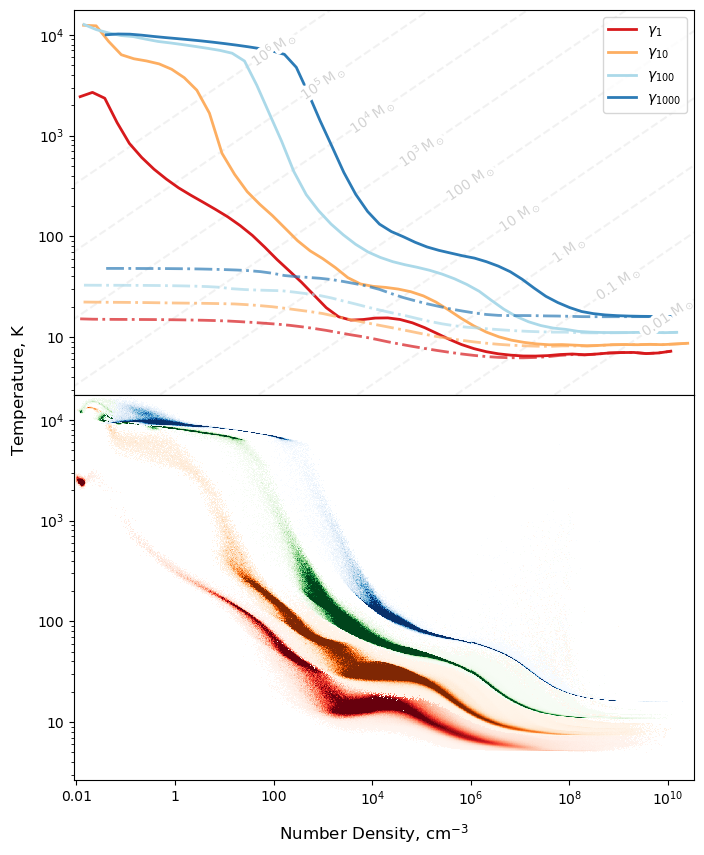

In [32]:
# Create the figure
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(8,10))
fig.subplots_adjust(hspace=0, wspace=0)

# Bin the gas and dust temperatures
bins=50

n1, t1 = binTemperatureDensity(uv1.gasTemp, uv1.numberDensity, uv1.mass, bins)
n10, t10 = binTemperatureDensity(uv10.gasTemp, uv10.numberDensity, uv10.mass, bins)
n100, t100 = binTemperatureDensity(uv100.gasTemp, uv100.numberDensity, uv100.mass, bins)
n1000, t1000 = binTemperatureDensity(uv1000.gasTemp, uv1000.numberDensity, uv1000.mass, bins)

n1, d1 = binTemperatureDensity(uv1.dustTemp, uv1.numberDensity, uv1.mass, bins)
n10, d10 = binTemperatureDensity(uv10.dustTemp, uv10.numberDensity, uv10.mass, bins)
n100, d100 = binTemperatureDensity(uv100.dustTemp, uv100.numberDensity, uv100.mass, bins)
n1000, d1000 = binTemperatureDensity(uv1000.dustTemp, uv1000.numberDensity, uv1000.mass, bins)

# Plot lines of constant Jeans Mass
T = 10**np.linspace(np.min(t1)-1, np.max(t1000)+1, 100)
M = np.array([0.01, 0.1, 1, 10, 100, 1000, 10000, 1e5, 1e6])
labels = ["0.01 $\\rm M_\\odot$","0.1 $\\rm M_\\odot$", "1 $\\rm M_\\odot$", "10 $\\rm M_\\odot$", "100 $\\rm M_\\odot$", "$10^3 \\, \\rm M_\\odot$", "$10^4 \\, \\rm M_\\odot$", "$10^5 \\, \\rm M_\\odot$", "$10^6 \\, \\rm M_\\odot$"]
for i in range(len(M)):
    ax[0].plot(nFromMass(T, M[i]*1.991e33), T, label=labels[i], color="lightgray", alpha=0.3, linestyle="--")
labelLines(ax[0].get_lines(), zorder=2.5, xvals=[1e10, 1e9, 1e8, 1e7, 1e6, 1e5, 1e4, 1e3, 1e2])

# Plot the top panel
ax[0].plot(10**n1, 10**d1, c.colours()[0], linewidth=2, linestyle="-.", alpha=0.7)
l1, = ax[0].plot(10**n1, 10**t1, c.colours()[0], label="$\\gamma_1$", linewidth=2)
ax[0].plot(10**n10, 10**d10, c.colours()[1], linewidth=2, linestyle="-.", alpha=0.7)
l2, = ax[0].plot(10**n10, 10**t10, c.colours()[1], label="$\\gamma_{10}$", linewidth=2)
ax[0].plot(10**n100, 10**d100, c.colours()[3], linewidth=2, linestyle="-.", alpha=0.7)
l3, = ax[0].plot(10**n100, 10**t100,  c.colours()[3], label="$\\gamma_{100}$", linewidth=2)
ax[0].plot(10**n1000, 10**d1000, c.colours()[4], linewidth=2, linestyle="-.", alpha=0.7)
l4, = ax[0].plot(10**n1000, 10**t1000, c.colours()[4], label="$\\gamma_{1000}$", linewidth=2)

ax[0].legend(loc="upper right", handles=[l1,l2,l3,l4])
ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_yticks([10, 100, 1000, 1e4], ["10", "100", "$10^3$", "$10^4$"])

# Create a common normalisation between the simulations
maxMasses = np.array([np.max(uv1.mass), np.max(uv10.mass), np.max(uv100.mass), np.max(uv1000.mass)])
minMasses = np.array([np.min(uv1.mass), np.min(uv10.mass), np.min(uv100.mass), np.min(uv1000.mass)])
totalNorm = matplotlib.colors.Normalize(vmin=np.min(minMasses)/1.991e33, vmax=10*np.max(maxMasses)/1.991e33, clip=False)

# Create log spaced bins for the histograms
xBins = np.linspace(np.log10(np.min(uv1.numberDensity)), np.log10(np.max(uv10.numberDensity)), 1000)
yBins = np.linspace(np.log10(np.min(uv1.gasTemp)), np.log10(np.max(uv1000.gasTemp)), 1000)
bins = (10**xBins, 10**yBins)

# Plot the histograms
h = ax[1].hist2d(uv1.numberDensity, uv1.gasTemp, weights=uv1.mass/c.uMass(), cmap="Reds", norm=totalNorm, cmin=0.0001, bins=bins)
h = ax[1].hist2d(uv10.numberDensity, uv10.gasTemp, weights=uv10.mass/c.uMass(), cmap="Oranges", norm=totalNorm, cmin=0.0001, bins=bins)
h = ax[1].hist2d(uv100.numberDensity, uv100.gasTemp, weights=uv100.mass/c.uMass(), cmap="Greens", norm=totalNorm, cmin=0.0001, bins=bins)
h = ax[1].hist2d(uv1000.numberDensity, uv1000.gasTemp, weights=uv1000.mass/c.uMass(), cmap="Blues", norm=totalNorm, cmin=0.0001, bins=bins)

# Add ticks and labels
ax[1].set_xticks([0.01, 1, 100, 1e4, 1e6, 1e8, 1e10], ["0.01", "1", "100", "$10^4$", "$10^6$", "$10^8$", "$10^{10}$"])

fig.supylabel("Temperature, $\\rm K$", x=0.045)
fig.supxlabel("Number Density, $\\rm {cm^{-3}}$", y=0.045)

### Heating and Cooling Rates

In [3]:
# Load in th snapshots
uv1 = readAREPO("/home/ca-mcusack/simulationRuns/postProcessing/cloudUV1_042.hdf5", 1, rates=True)
uv1.extractRates()
uv10 = readAREPO("/home/ca-mcusack/simulationRuns/postProcessing/cloudUV10_043.hdf5", 1, rates=True)
uv10.extractRates()
uv100 = readAREPO("/home/ca-mcusack/simulationRuns/postProcessing/cloudUV100_078.hdf5", 1, rates=True)
uv100.extractRates()
uv1000 = readAREPO("/home/ca-mcusack/simulationRuns/postProcessing/cloudUV1000_073.hdf5", 1, rates=True)
uv1000.extractRates()

In [2]:
def binRates(data, nBins=100, normalised=False):
    # Create bins of density 
    densityBins = 10**np.linspace(np.log10(np.min(data.numberDensity))+0.0001, np.log10(np.max(data.numberDensity))-0.0001, 100)

    # Create arrays to store rates
    gasGrain = np.zeros_like(densityBins)
    pdVwork = np.zeros_like(densityBins)

    uvPump = np.zeros_like(densityBins)
    photoElec = np.zeros_like(densityBins)
    H2PhotoDiss = np.zeros_like(densityBins)

    cosmicRays = np.zeros_like(densityBins)
    H2Form = np.zeros_like(densityBins)

    coCool = np.zeros_like(densityBins)
    cPlusCool = np.zeros_like(densityBins)
    oCool = np.zeros_like(densityBins)
    H2cool = np.zeros_like(densityBins)
    lymanA = np.zeros_like(densityBins)

    # Loop through bins and calculate
    for i in range(len(densityBins)):
        if i == 0:
            inBin = np.where(data.numberDensity <= densityBins[0])
        elif i == len(densityBins) - 1:
            inBin = np.where(data.numberDensity > densityBins[-1])
        else:
            inBin = np.where((data.numberDensity > densityBins[i]) & (data.numberDensity <= densityBins[i+1]))

        # Heating/Cooling
        gasGrain[i] = np.mean(data.gasGrain[inBin])
        pdVwork[i] = 0#np.mean(data.rho[inBin] * np.sqrt(data.vx[inBin]**2 + data.vy[inBin]**2 + data.vz[inBin]**2) * abs(data.velocityDivergence[inBin]/c.uVel()))

        # Heating
        cosmicRays[i] = -1*np.mean(data.cosmicRays[inBin])
        uvPump[i] = -1*np.mean(data.UVpump[inBin])
        photoElec[i] = -1*np.mean(data.photoElectric[inBin])
        H2PhotoDiss[i] = -1*np.mean(data.H2dissPhoto[inBin])
        H2Form[i] = -1*np.mean(data.H2form[inBin])

        # Cooling
        coCool[i] = np.mean(data.COcool[inBin])
        cPlusCool[i] = np.mean(data.CIfineStruc[inBin]) + np.mean(data.CIIfineStruc[inBin])
        oCool[i] = np.mean(data.OIfineStruc[inBin])
        H2cool[i] = np.mean(data.H2cool[inBin])
        lymanA[i] = np.mean(data.lymanAlpha[inBin])

        if normalised:
            total = np.sum(gasGrain[i] + pdVwork[i] + cosmicRays[i] + uvPump[i] + photoElec[i] + H2PhotoDiss[i] + H2Form[i] + coCool[i] +  cPlusCool[i] + oCool[i] + H2cool[i] + lymanA[i])
            gasGrain[i] = gasGrain[i] / total
            pdVwork[i] = pdVwork[i] / total
            cosmicRays[i] = cosmicRays[i] / total
            uvPump[i] = uvPump[i] / total
            photoElec[i] = photoElec[i] / total
            H2PhotoDiss[i] = H2PhotoDiss[i] / total
            H2Form[i] = H2Form[i] / total
            coCool[i] = coCool[i] / total
            cPlusCool[i] = cPlusCool[i] / total
            oCool[i] = oCool[i] / total
            H2cool[i] = H2cool[i] / total
            lymanA[i] = lymanA[i] / total

    return densityBins, gasGrain, pdVwork, cosmicRays, uvPump, photoElec, H2PhotoDiss, H2Form, coCool, cPlusCool, oCool, H2cool, lymanA

In [4]:
densityBins, gasGrain, pdVwork, cosmicRays, uvPump, photoElec, H2PhotoDiss, H2Form, coCool, cPlusCool, oCool, H2cool, lymanA = binRates(uv1000, normalised=False)

(1e-27, 1e-15)

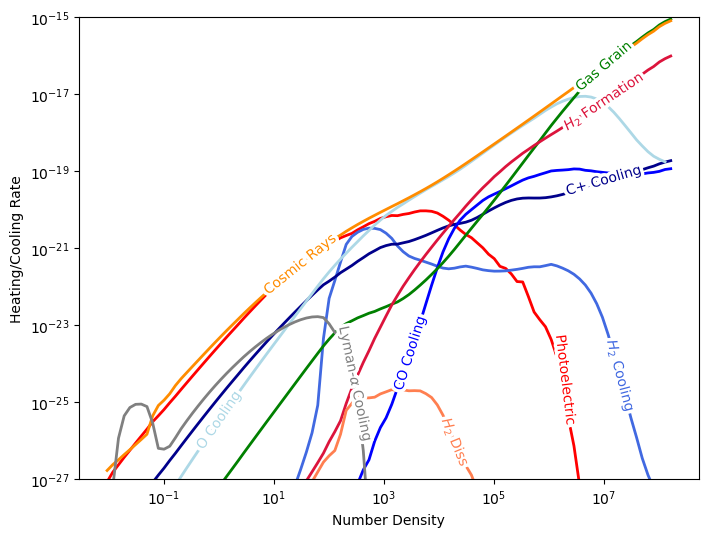

In [21]:
fig, ax = plt.subplots(1,1, figsize=(8,6))

ax.plot(densityBins, photoElec, "red", label="Photoelectric", linewidth=2)

ax.plot(densityBins, H2cool, "royalblue", label="$H_2$ Cooling", linewidth=2)
ax.plot(densityBins, cPlusCool, "darkblue", label="C+ Cooling", linewidth=2)
ax.plot(densityBins, coCool, "blue", label="CO Cooling", linewidth=2)
ax.plot(densityBins[1:-1], (oCool[2::] + oCool[:-2])/2, "lightblue", label="O Cooling", linewidth=2)

ax.plot(densityBins, gasGrain, "green", label="Gas Grain", linewidth=2)
ax.plot(densityBins, cosmicRays, "darkorange", label="Cosmic Rays", linewidth=2)
ax.plot(densityBins, H2Form, "crimson", label="$H_2$ Formation", linewidth=2)
ax.plot(densityBins, H2PhotoDiss, "coral", label="$H_2$ Diss", linewidth=2)
ax.plot(densityBins, lymanA, "gray", label="Lyman-$\\alpha$ Cooling", linewidth=2)


ax.set_xscale("log")
ax.set_yscale("log")

xPositions = [2e6, 2e7, 1e7, 3e3, 1, 1e7, 3e1, 1e7, 2e4, 3e2]

labelLines(ax.get_lines(), xvals=xPositions)

ax.set_xlabel("Number Density")
ax.set_ylabel("Heating/Cooling Rate")

ax.set_ylim(1e-27, 1e-15)

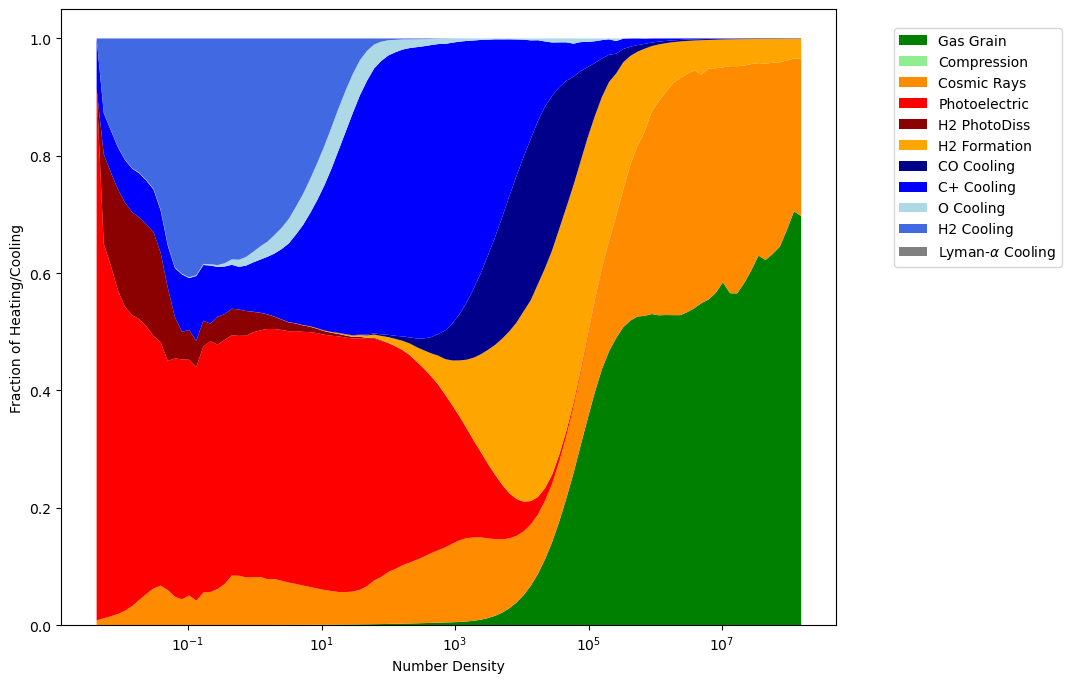

In [45]:
#colors = ["green", "lightgreen", "darkorange", "darkred", "orange", "yellow", "pink", "darkblue", "lightblue", "blue", "purple", "grey"]
colors = ["green", "lightgreen", "darkorange", "red", "darkred", "orange", "darkblue", "blue", "lightblue", "royalblue", "grey"]
labels = ["Gas Grain", "Compression", "Cosmic Rays", "Photoelectric", "H2 PhotoDiss", "H2 Formation", "CO Cooling", "C+ Cooling", "O Cooling", "H2 Cooling", "Lyman-$\\alpha$ Cooling"]

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)

ax.stackplot(densityBins, [gasGrain, pdVwork, cosmicRays, photoElec, H2PhotoDiss, H2Form, coCool, cPlusCool, oCool, H2cool, lymanA], colors=colors, labels=labels)

ax.set_xscale("log")
ax.set_xlabel("Number Density")
ax.set_ylabel("Fraction of Heating/Cooling")

ax.legend(bbox_to_anchor=(1.3, 0.98))

In [ ]:
fig = plt.figure(figsize=(10,8))

Text(0, 0.5, 'Heating / Cooling Rate')

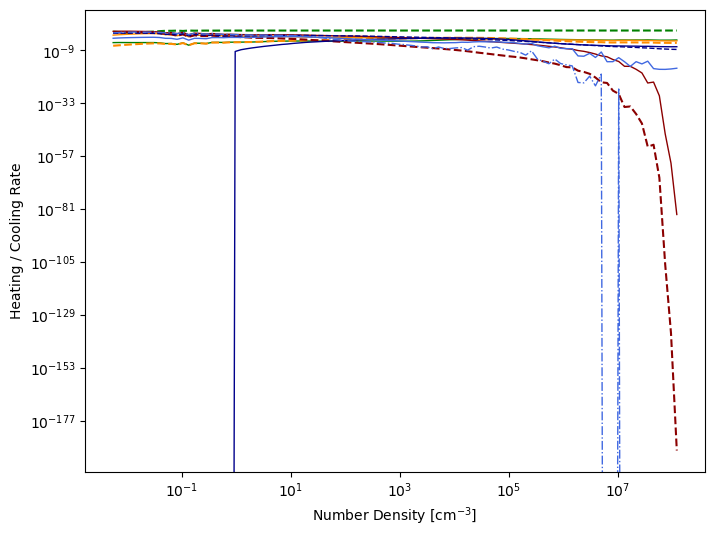

In [75]:

plt.figure(figsize=(8,6))

# Heating/Cooling
plt.plot(densityBins, gasGrain, "g", linewidth=1)
plt.plot(densityBins, pdVwork, "green", linestyle="--")

# Heating
plt.plot(densityBins, cosmicRays, "darkorange", linewidth=1)
plt.plot(densityBins, H2Form, "darkorange", linestyle="--")

plt.plot(densityBins, photoElec, "darkred", linewidth=1)
plt.plot(densityBins, H2PhotoDiss, "darkred", linestyle="--")

# Cooling
plt.plot(densityBins, coCool, "darkblue", linewidth=1)
plt.plot(densityBins, cPlusCool, "darkblue", linestyle="--", linewidth=1)

plt.plot(densityBins, oCool, "royalblue", linewidth=1)
plt.plot(densityBins, H2cool, "royalblue", linestyle="-.", linewidth=1)


#
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Number Density $[\\rm cm^{-3}]$")
plt.ylabel("Heating / Cooling Rate")